In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning_SWE_427/4K_House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
print(set(data['Area Type']))
print(set(data['City']))
print(set(data['Tenant Preferred']))
print(set(data['Furnishing Status']))

{'Carpet Area', 'Super Area', 'Built Area'}
{'Chennai', 'Delhi', 'Kolkata', 'Hyderabad', 'Bangalore', 'Mumbai'}
{'Bachelors', 'Bachelors/Family', 'Family'}
{'Furnished', 'Unfurnished', 'Semi-Furnished'}


In [ ]:
replacement_vector = {'Carpet Area' : 1, 'Super Area' : 2, 'Built Area' : 3, 'Bangalore' : 4, 
                      'Kolkata' : 5, 'Hyderabad' : 6, 'Mumbai' : 7, 'Chennai' : 8, 'Delhi' : 9, 
                      'Bachelors' : 10, 'Family' : 11, 'Bachelors/Family' : 12, 'Furnished' : 13, 
                      'Semi-Furnished' : 14, 'Unfurnished' : 15}

Y = data['Rent'].values
X1 = data['BHK'].values
X2 = data['Size'].values
dummy_X3 = data['Area Type'].values
dummy_X4 = data['City'].values
dummy_X5 = data['Tenant Preferred'].values
dummy_X6 = data['Furnishing Status'].values
X3 = []
X4 = []
X5 = []
X6 = []
X7 = data['Bathroom'].values

print(len(Y), len(X1), len(X2), len(dummy_X3), len(dummy_X4), len(dummy_X5), len(dummy_X6), len(X7))

m = len(Y)

for i in range(m):
  X3.append(replacement_vector[dummy_X3[i]])
  X4.append(replacement_vector[dummy_X4[i]])
  X5.append(replacement_vector[dummy_X5[i]])
  X6.append(replacement_vector[dummy_X6[i]])
print(X3)
print(X4)
print(X5)
print(X6)

4746 4746 4746 4746 4746 4746 4746 4746
[2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,

In [ ]:
Y = np.transpose(Y)
X = []
for i in range(m):
  X.append([1, X1[i], X2[i], X3[i], X4[i], X5[i], X6[i], X7[i]])
print(X)

[[1, 2, 1100, 2, 5, 12, 15, 2], [1, 2, 800, 2, 5, 12, 14, 1], [1, 2, 1000, 2, 5, 12, 14, 1], [1, 2, 800, 2, 5, 12, 15, 1], [1, 2, 850, 1, 5, 10, 15, 1], [1, 2, 600, 2, 5, 12, 15, 2], [1, 2, 700, 2, 5, 10, 15, 2], [1, 1, 250, 2, 5, 10, 15, 1], [1, 2, 800, 1, 5, 10, 15, 2], [1, 2, 1000, 1, 5, 12, 14, 2], [1, 3, 1200, 1, 5, 12, 14, 2], [1, 1, 400, 1, 5, 12, 15, 1], [1, 1, 250, 1, 5, 10, 13, 1], [1, 1, 375, 1, 5, 12, 15, 1], [1, 3, 900, 1, 5, 10, 15, 2], [1, 3, 1286, 1, 5, 12, 13, 2], [1, 2, 600, 2, 5, 12, 14, 1], [1, 2, 800, 2, 5, 12, 15, 1], [1, 2, 2000, 1, 5, 12, 15, 1], [1, 2, 660, 2, 5, 12, 15, 1], [1, 2, 650, 1, 5, 11, 15, 1], [1, 2, 400, 1, 5, 10, 15, 2], [1, 1, 300, 1, 5, 12, 15, 1], [1, 3, 1600, 2, 5, 12, 15, 1], [1, 1, 400, 2, 5, 10, 14, 1], [1, 2, 1000, 2, 5, 12, 15, 1], [1, 1, 355, 1, 5, 12, 14, 1], [1, 2, 1000, 2, 5, 12, 14, 1], [1, 2, 800, 2, 5, 12, 15, 1], [1, 2, 850, 2, 5, 12, 15, 2], [1, 1, 350, 1, 5, 12, 15, 1], [1, 2, 900, 1, 5, 12, 15, 2], [1, 2, 550, 2, 5, 12, 14, 1], 

In [ ]:
import numpy.linalg as lalg 
Xt = np.transpose(X)
XtX = np.matmul(Xt,X)
inverse_XtX = lalg.inv(XtX)
print(inverse_XtX)

[[ 1.68707028e-01 -2.75069147e-04 -1.15692378e-06  1.59346415e-03
  -5.47073232e-04 -5.17242958e-03 -7.32289782e-03 -8.43383946e-04]
 [-2.75069147e-04  9.19902126e-04 -3.54470702e-07  3.97076059e-05
  -1.14814330e-05 -4.48543965e-06 -1.80885820e-05 -4.96154352e-04]
 [-1.15692378e-06 -3.54470702e-07  1.35281216e-09 -1.16138962e-07
   6.08090814e-08  4.40498665e-08  5.46241569e-08 -4.66836982e-07]
 [ 1.59346415e-03  3.97076059e-05 -1.16138962e-07  1.01771815e-03
   1.19405693e-05 -2.37235190e-04 -4.65999131e-05  1.11654422e-04]
 [-5.47073232e-04 -1.14814330e-05  6.08090814e-08  1.19405693e-05
   8.13388280e-05  5.98764553e-06 -1.82096325e-06 -3.87409013e-05]
 [-5.17242958e-03 -4.48543965e-06  4.40498665e-08 -2.37235190e-04
   5.98764553e-06  4.14735341e-04  4.82010439e-05 -8.54146874e-06]
 [-7.32289782e-03 -1.80885820e-05  5.46241569e-08 -4.65999131e-05
  -1.82096325e-06  4.82010439e-05  4.73001141e-04  5.00054930e-05]
 [-8.43383946e-04 -4.96154352e-04 -4.66836982e-07  1.11654422e-04
  -

In [ ]:
XtY = np.matmul(Xt,Y)
theta = np.matmul(inverse_XtX,XtY)
print(theta)
np.shape(theta)

[ 5.05717426e+04 -2.66509858e+03  2.80753836e+01 -2.45717021e+04
  2.13769848e+03  2.64510844e+03 -6.20219263e+03  2.23717272e+04]


(8,)

In [ ]:
t0 = theta[0]
t1 = theta[1]
t2 = theta[2]
t3 = theta[3]
t4 = theta[4]
t5 = theta[5]
t6 = theta[6]
t7 = theta[7]
print(t0,t1,t2,t3,t4,t5,t6,t7)

50571.74263490923 -2665.098584768886 28.075383636608876 -24571.702083555632 2137.6984807156186 2645.1084430459887 -6202.192631268699 22371.727242779045


In [ ]:
total = 0
for j in range(m):
  total += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) ** 2

cost = total / (m * 2)
cost

2320579904.2143435

In [ ]:
dummy_prediction = t0 + t1 * 2 + t2 * 1100 + t3 * replacement_vector['Super Area'] + t4 * replacement_vector['Delhi'] + t5 * replacement_vector['Bachelors/Family'] + t6 * replacement_vector['Unfurnished'] + t7 * 2
print(dummy_prediction)

29672.215958049987


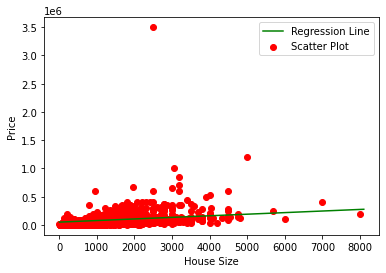

In [ ]:
max_x = np.max(X2) + 100
min_x = np.min(X2)
x = np.linspace(min_x, max_x, 1000)
y = t2 * x + t0
plt.plot(x, y, color='green', label='Regression Line')
plt.scatter(X2, Y, c = "red", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()